In [1]:
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,GRU,Dropout , LSTM , Flatten
from tensorflow.keras.optimizers import SGD
import numpy as np
from sklearn.metrics import accuracy_score

from tensorflow.keras.callbacks import EarlyStopping


In [2]:
columns = ["duration",
"protocol_type",
"service",
"flag",
"src_bytes",
"dst_bytes",
"land",
"wrong_fragment",
"urgent",
"hot",
"num_failed_logins",
"logged_in",
"num_compromised",
"root_shell",
"su_attempted",
"num_root",
"num_file_creations",
"num_shells",
"num_access_files",
"num_outbound_cmds",
"is_host_login",
"is_guest_login",
"count",
"srv_count",
"serror_rate",
"srv_serror_rate",
"rerror_rate",
"srv_rerror_rate",
"same_srv_rate",
"diff_srv_rate",
"srv_diff_host_rate",
"dst_host_count",
"dst_host_srv_count",
"dst_host_same_srv_rate",
"dst_host_diff_srv_rate",
"dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate",
"dst_host_serror_rate",
"dst_host_srv_serror_rate",
"dst_host_rerror_rate",
"dst_host_srv_rerror_rate",
"class"]

##### Loading the dataset

In [3]:
data = pd.read_csv('KDDTrain+_2.csv',header=None,names=columns)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [5]:
label = data[data.columns[len(data.columns)-1]]
label.value_counts()

class
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [6]:
data = data.drop('class' , axis=1)

In [7]:
drop_col = ['duration' , 'service' , 'dst_bytes' , 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count','dst_host_diff_srv_rate' , 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']

In [8]:
data = data.drop(drop_col , axis=1)

In [9]:
data.head()

,protocol_type,flag,src_bytes,land,wrong_fragment,count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate
0,tcp,SF,491,0,0,2,25,0.17,0.17
1,udp,SF,146,0,0,13,1,0.00,0.88
2,tcp,S0,0,0,0,123,26,0.10,0.00
3,tcp,SF,232,0,0,5,255,1.00,0.03
4,tcp,SF,199,0,0,30,255,1.00,0.00


In [10]:
label.head()

0     normal
1     normal
2    neptune
3     normal
4     normal
Name: class, dtype: object

In [11]:
attacks = {'back': 'dos', 'land': 'dos', 'neptune': 'dos', 'pod': 'dos', 'smurf': 'dos', 'teardrop': 'dos', 'processtable': 'dos', 'udpstorm': 'dos', 'mailbomb': 'dos', 'apache2': 'dos', 'ipsweep': 'probe', 'mscan': 'probe', 'nmap': 'probe', 'portsweep': 'probe', 'saint': 'probe', 'satan': 'probe', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'multihop': 'r2l', 'phf': 'r2l', 'warezmaster': 'r2l', 'warezclient': 'r2l', 'spy': 'r2l', 'sendmail': 'r2l', 'xlock': 'r2l', 'snmpguess': 'r2l', 'named': 'r2l', 'xsnoop': 'r2l', 'snmpgetattack': 'r2l', 'worm': 'r2l', 'buffer_overflow': 'u2r', 'loadmodule': 'u2r', 'perl': 'u2r', 'rootkit': 'u2r', 'xterm': 'u2r', 'ps': 'u2r', 'httptunnel': 'u2r', 'sqlattack': 'u2r', 'normal': 'normal'}

In [12]:
label = label.map(attacks)

In [13]:
label.value_counts()

class
normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: count, dtype: int64

#### Converting string values into integer values

In [14]:
attack_label = {'normal' : 0 , 'dos' : 1 , 'probe' : 2 , 'r2l' : 3 , 'u2r' : 4}
label = label.map(attack_label)

In [15]:
label.value_counts()

class
0    67343
1    45927
2    11656
3      995
4       52
Name: count, dtype: int64

In [16]:
data.head()

,protocol_type,flag,src_bytes,land,wrong_fragment,count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate
0,tcp,SF,491,0,0,2,25,0.17,0.17
1,udp,SF,146,0,0,13,1,0.00,0.88
2,tcp,S0,0,0,0,123,26,0.10,0.00
3,tcp,SF,232,0,0,5,255,1.00,0.03
4,tcp,SF,199,0,0,30,255,1.00,0.00


In [17]:
text_columns = data.select_dtypes(exclude='number').columns.tolist()
for column in text_columns:
    _list = data[column].unique().tolist()
    _dict = {}
    for x in range(len(_list)):
        _dict[_list[x]] = x
    data[column] = data[column].map(_dict)
data.head()

,protocol_type,flag,src_bytes,land,wrong_fragment,count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate
0,0,0,491,0,0,2,25,0.17,0.17
1,1,0,146,0,0,13,1,0.00,0.88
2,0,1,0,0,0,123,26,0.10,0.00
3,0,0,232,0,0,5,255,1.00,0.03
4,0,0,199,0,0,30,255,1.00,0.00


#### Data Normalization

In [18]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data.shape

(125973, 9)

In [19]:
data = np.reshape(data, (data.shape[0], 1, data.shape[1]))
data.shape

(125973, 1, 9)

#### Spliting the dataset

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.33, random_state=42)

In [21]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(84401, 1, 9) (41572, 1, 9) (84401,) (41572,)


#### Model creation

In [22]:
# model = Sequential([
#     GRU(256, input_shape=(1, 8)),
#     Dropout(0.2),
#     Dense(64,activation='relu'),
#     Dropout(0.2),
#     Dense(64,activation='relu'),
#     Dropout(0.2),
#     Dense(5, activation='softmax')
# ])


model = Sequential([
    LSTM(64,return_sequences=True,input_shape = (1,X_train.shape[2])),
    Dropout(0.2),
    LSTM(64,return_sequences=True),
    Dropout(0.2),
    LSTM(64,return_sequences=True),
    Flatten(),
    Dense(units=64),
    Dense(units=5 , activation = 'softmax')]) 

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             18944     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             33024     
                                                                 
 dropout_1 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4

In [24]:
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

In [25]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [26]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#### Training the model

In [35]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=1 , callbacks=[early_stopping])


Epoch 1/100
4748/4748 [==============================] - 78s 16ms/step - loss: 0.1142 - accuracy: 0.9638 - val_loss: 0.0973 - val_accuracy: 0.9679
Epoch 2/100
4748/4748 [==============================] - 92s 19ms/step - loss: 0.1135 - accuracy: 0.9633 - val_loss: 0.1078 - val_accuracy: 0.9653
Epoch 3/100
4748/4748 [==============================] - 74s 16ms/step - loss: 0.1131 - accuracy: 0.9635 - val_loss: 0.1014 - val_accuracy: 0.9685
Epoch 4/100
4748/4748 [==============================] - 78s 17ms/step - loss: 0.1116 - accuracy: 0.9641 - val_loss: 0.0967 - val_accuracy: 0.9672
Epoch 5/100
4748/4748 [==============================] - 69s 15ms/step - loss: 0.1103 - accuracy: 0.9642 - val_loss: 0.0954 - val_accuracy: 0.9662
Epoch 6/100
4748/4748 [==============================] - 78s 16ms/step - loss: 0.1098 - accuracy: 0.9642 - val_loss: 0.0971 - val_accuracy: 0.9677
Epoch 7/100
4748/4748 [==============================] - 67s 14ms/step - loss: 0.1089 - accuracy: 0.9644 - val_loss: 0

In [29]:
y_pred = model.predict(X_test)

1300/1300 [==============================] - 16s 9ms/step


### Converting output into categories

In [30]:
#printing the output of softmax funtion
print(y_pred)

#converting the output into a numpy array
output = np.array(y_pred)

#converting the output into categorical value
y_pred = np.argmax(output,axis=1)
print(y_pred)

[[6.28399730e-01 8.13854349e-05 3.70145380e-01 1.27969321e-03
  9.38078010e-05]
 [1.32276036e-03 9.98489141e-01 9.68337008e-06 1.15983385e-04
  6.25402463e-05]
 [1.22731581e-04 9.99864936e-01 3.71806004e-06 3.04965829e-06
  5.51036510e-06]
 ...
 [9.99270499e-01 5.20888570e-05 4.55487403e-04 2.11613951e-04
  1.02538916e-05]
 [9.96000469e-01 3.69632780e-03 1.35378941e-04 1.34960632e-04
  3.29467512e-05]
 [8.88579598e-05 9.99889135e-01 1.77296424e-05 1.06102163e-06
  3.18473667e-06]]
[0 1 1 ... 0 0 1]


#### Model Testing

In [31]:
accuracy = accuracy_score(y_test,y_pred)
accuracy*100

96.71894544404887

Confusion Matrix
[[21844    14   213   122     0]
 [  366 14698    43     2     0]
 [  276   159  3461     0     0]
 [  151     0     1   205     0]
 [   10     0     0     7     0]]


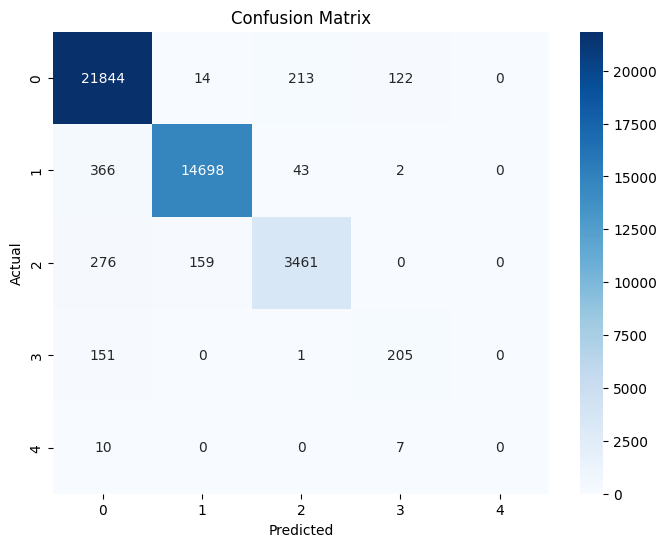

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix




cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


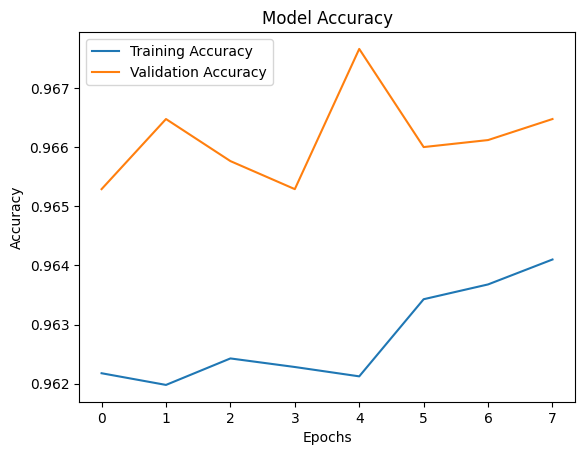

In [34]:
plt.plot(history.history['accuracy'] , label='Training Accuracy')
plt.plot(history.history['val_accuracy'] , label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model, save_model

In [ ]:
save_model(model, 'model_1.h5')

In [39]:
for layer in model.layers:
    print(f"{layer.name}: input shape {layer.input_shape}\n\t output shape {layer.output_shape}")


lstm: input shape (None, 1, 9)
	 output shape (None, 1, 64)
dropout: input shape (None, 1, 64)
	 output shape (None, 1, 64)
lstm_1: input shape (None, 1, 64)
	 output shape (None, 1, 64)
dropout_1: input shape (None, 1, 64)
	 output shape (None, 1, 64)
lstm_2: input shape (None, 1, 64)
	 output shape (None, 1, 64)
flatten: input shape (None, 1, 64)
	 output shape (None, 64)
dense: input shape (None, 64)
	 output shape (None, 64)
dense_1: input shape (None, 64)
	 output shape (None, 5)
